# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

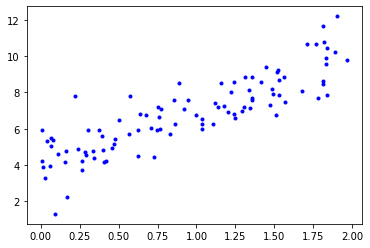

In [5]:
plt.plot(X, y, "b.")
plt.show()

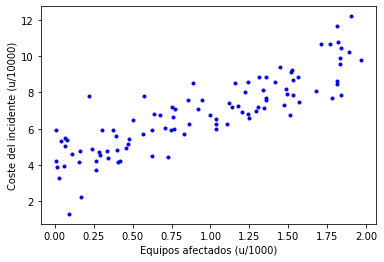

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [7]:
import pandas as pd

In [8]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.419074,4.205147
1,1.038430,5.981620
2,1.205276,6.929852
3,1.766383,10.694816
4,0.884766,8.515407
5,1.313604,8.832701
6,1.779383,7.711722
7,0.408554,4.139311
8,1.294422,6.963688
9,0.624827,5.939238


In [9]:
# Escalado del número de equipos afectados 
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

#Es mejor escalar los datos para poder interpretarlos bien (con 2 variables no sería necesario)

,n_equipos_afectados,coste
0,419,42051
1,1038,59816
2,1205,69298
3,1766,106948
4,884,85154
5,1313,88327
6,1779,77117
7,408,41393
8,1294,69636
9,624,59392


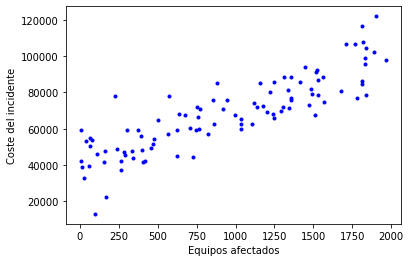

In [11]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values) #En modelo de regresión lineal el primer valor tiene  que ser una matrix

LinearRegression()

In [16]:
# Parámetro theta 0
lin_reg.intercept_

40277.374770228314

In [17]:
# Parámetro theta 1
lin_reg.coef_

array([29.86380789])

Y = 37328.14 + 30.22*X #esto habría que cambiarlo con los valores que he obtenido (40277.37 y 29.86)


In [18]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

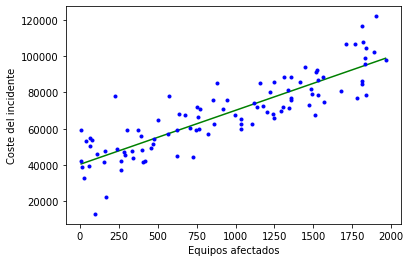

In [19]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [20]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 79100 €


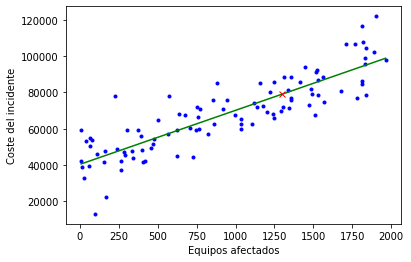

In [21]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()